In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

In [2]:
germ_data = pd.read_csv(r'grm.csv')

In [3]:
survey = germ_data.loc[:, germ_data.columns.notnull()]

In [4]:
print(survey.columns)

Index(['Timestamp', '1. In welchem ​​Land leben Sie derzeit?',
       '2. In welchem ​​Land bist du am meisten gefahren?',
       '3. Wie alt bist du?', '4. Was ist dein Geschlecht?',
       '5. Was ist Ihre ethnische Herkunft/Rasse?',
       '6. Was hast du für eine Ausbildung?',
       '7. Was ist Ihr Beschäftigungsstatus?',
       '8. Was ist Ihre Einkommensspanne?', '9. Wie ist Ihr Familienstand',
       '10. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
       '11. Was Ihr Verhalten meistens am besten beschreibt, wenn es darum geht, Spurwechsel während der Fahrt zu signalisieren: NICHT-AUTOBAHNSTRASSEN',
       '12. Was Ihr Spurwechselverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
       '13. Wenn Sie die Fahrspur auf einer Straße ändern möchten, die keine Autobahn ist, und auf eine Fahrspur wechseln möchten, die 2 oder mehr Fahrspuren entfernt ist',
       '14. Wie würden Sie die

In [5]:
i = 0
for column in survey.columns:
    if(i != 0):
        col_name = str(column)
        try:
            num = re.findall(r'\d+', str(col_name))[0]
        except:
            print(col_name)
        if(int(num)<=9):
            survey.rename(columns = {col_name:f'demographic_{column}'}, inplace = True)
        if((int(num)>=10) and (int(num)<=17)):
            survey.rename(columns = {col_name:f'dbnh_{column}'}, inplace = True)
        if((int(num)>=18) and (int(num)<=26)):
            survey.rename(columns = {col_name:f'dbh_{column}'}, inplace = True)
        if((int(num)>=27) and (int(num)<=38)):
            survey.rename(columns = {col_name:f'dbg_{column}'}, inplace = True)
        if((int(num)>=39) and (int(num)<=45)):
            survey.rename(columns = {col_name:f'ait_{column}'}, inplace = True)
        if((int(num)>=46) and (int(num)<=51)):
            survey.rename(columns = {col_name:f'ainh_{column}'}, inplace = True)
        if((int(num)>=52) and (int(num)<=57)):
            survey.rename(columns = {col_name:f'aih_{column}'}, inplace = True)
    i = i+1
print(survey.columns)

Index(['Timestamp', 'demographic_1. In welchem ​​Land leben Sie derzeit?',
       'demographic_2. In welchem ​​Land bist du am meisten gefahren?',
       'demographic_3. Wie alt bist du?',
       'demographic_4. Was ist dein Geschlecht?',
       'demographic_5. Was ist Ihre ethnische Herkunft/Rasse?',
       'demographic_6. Was hast du für eine Ausbildung?',
       'demographic_7. Was ist Ihr Beschäftigungsstatus?',
       'demographic_8. Was ist Ihre Einkommensspanne?',
       'demographic_9. Wie ist Ihr Familienstand',
       'dbnh_10. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
       'dbnh_11. Was Ihr Verhalten meistens am besten beschreibt, wenn es darum geht, Spurwechsel während der Fahrt zu signalisieren: NICHT-AUTOBAHNSTRASSEN',
       'dbnh_12. Was Ihr Spurwechselverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
       'dbnh_13. Wenn Sie die Fahrspur auf einer Straße ändern möc

In [6]:
for column in survey.columns:
        if(str.startswith(column, 'dbnh')):
            print(f'\'{column}\',')

'dbnh_10. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
'dbnh_11. Was Ihr Verhalten meistens am besten beschreibt, wenn es darum geht, Spurwechsel während der Fahrt zu signalisieren: NICHT-AUTOBAHNSTRASSEN',
'dbnh_12. Was Ihr Spurwechselverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
'dbnh_13. Wenn Sie die Fahrspur auf einer Straße ändern möchten, die keine Autobahn ist, und auf eine Fahrspur wechseln möchten, die 2 oder mehr Fahrspuren entfernt ist',
'dbnh_14. Wie würden Sie die Art und Weise beschreiben, wie Sie während der Fahrt beschleunigen und abbremsen: NICHT-AUTOBAHNSTRASSEN',
'dbnh_15. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: NICHT-AUTOBAHNSTRASSEN',
'dbnh_16. Welchen Abstand halten Sie normalerweise zum vorausfahrenden Auto, wenn Sie auf folgenden Straßen fahren: NICHT AUTOBAHNSTRASSEN',
'dbnh_17. Was Ihr Bremsverhalten beim Weiterfahren am besten beschreibt: NI

In [7]:
dbnh_values = survey[['dbnh_10. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
'dbnh_11. Was Ihr Verhalten meistens am besten beschreibt, wenn es darum geht, Spurwechsel während der Fahrt zu signalisieren: NICHT-AUTOBAHNSTRASSEN',
'dbnh_12. Was Ihr Spurwechselverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN',
'dbnh_13. Wenn Sie die Fahrspur auf einer Straße ändern möchten, die keine Autobahn ist, und auf eine Fahrspur wechseln möchten, die 2 oder mehr Fahrspuren entfernt ist',
'dbnh_14. Wie würden Sie die Art und Weise beschreiben, wie Sie während der Fahrt beschleunigen und abbremsen: NICHT-AUTOBAHNSTRASSEN',
'dbnh_15. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: NICHT-AUTOBAHNSTRASSEN',
'dbnh_16. Welchen Abstand halten Sie normalerweise zum vorausfahrenden Auto, wenn Sie auf folgenden Straßen fahren: NICHT AUTOBAHNSTRASSEN',
'dbnh_17. Was Ihr Bremsverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN']]

In [8]:
dbnh_values.iloc[:,0].unique()
dbnh_0_key = { 'Ich fahre normalerweise unter dem Tempolimit (mehr als 10 km/h UNTER dem Tempolimit).': 0,
               'Ich fahre normalerweise über dem Tempolimit (mehr als 10 km/h ÜBER dem Tempolimit).': 1,
               'Normalerweise fahre ich die Geschwindigkeitsbegrenzung (innerhalb von plus oder minus 10 km/h).': .5
}
dbnh_values.iloc[:,0].replace(dbnh_0_key, inplace = True)

In [9]:
dbnh_values.iloc[:,1].unique()
dbnh_1_key = { 'Ich signalisiere JEDE Bewegung (Sie verwenden Ihr Signal zu 100 %)': 0,
                'Ich signalisiere manchmal eine Bewegung: (Sie verwenden Ihr Signal in 50 % der Fälle)': .75,
                'Ich signalisiere meine Bewegungen oft (Sie verwenden Ihr Signal 75 % der Zeit)': .25,
                'Ich signalisiere selten eine Bewegung: (Sie verwenden Ihr Signal 25 % der Zeit oder weniger)':1
}
dbnh_values.iloc[:,1].replace(dbnh_1_key, inplace = True)

In [10]:
dbnh_values.iloc[:,2].unique()
dbnh_2_key = { 'Ich wechsle die Spur nur, wenn es sein muss.': 0,
                'Ich wechsle gelegentlich die Spur, um ein extrem langsames Fahrzeug zu überholen.': .5,
                'Ich wechsle häufig die Spur, um auf der schnellstmöglichen Spur zu sein.': 1
}
dbnh_values.iloc[:,2].replace(dbnh_2_key, inplace = True)

In [11]:
dbnh_3_key = { 'Sie planen voraus und wechseln die Spur jeweils um eine Spur, wenn Sie eine Öffnung sehen. Sie wechseln selten mehrere Fahrspuren gleichzeitig.': 0,
                'Manchmal wechseln Sie mehrere Fahrspuren gleichzeitig und manchmal planen Sie im Voraus und wechseln die Fahrspuren jeweils eine Spur nach der anderen.': .5,
                'Sie wechseln häufig alle Fahrspuren auf einmal. (Dies kann bedeuten, dass 2 oder mehr Fahrspuren gleichzeitig gewechselt werden)': 1
}
dbnh_values.iloc[:,3].replace(dbnh_3_key, inplace = True)

In [12]:
dbnh_4_key = {'Normalerweise beschleunigen und verlangsamen Sie langsam und es dauert eine Weile, bis Sie auf Geschwindigkeit kommen. Sie vermeiden einen kurzen Stopp.': 0,
            'Sie beschleunigen und verlangsamen normalerweise in einem moderaten Tempo und kommen relativ schnell auf Geschwindigkeit. Sie halten selten an und die Passagiere fühlen sich beim Fahren nicht vorwärts oder rückwärts geschleudert.':.5,
            'Sie beschleunigen und verzögern normalerweise sehr schnell und kommen schnell auf Geschwindigkeit, aber Sie fühlen sich möglicherweise während der Fahrt häufig vorwärts oder rückwärts geschleudert.':1
}
dbnh_values.iloc[:,4].replace(dbnh_4_key, inplace = True)

In [13]:
dbnh_5_key = {'Selten (Ich überhole Fahrzeuge nur, wenn es unbedingt sein muss)':0,
            'Manchmal (ich überhole andere Fahrzeuge nur in wenigen Situationen)':.25,
            'Oft (ich überhole andere Fahrzeuge in verschiedenen Situationen)':.75,
            'Immer (Egal in welcher Situation, ich überhole Fahrzeuge, wann immer ich die Möglichkeit dazu habe)':1
}
dbnh_values.iloc[:,5].replace(dbnh_5_key, inplace = True)

In [14]:
dbnh_6_key = {'Fern':0,
            'Mittlere Distanz':.5,
            'Kurzedistanz':1
}
dbnh_values.iloc[:,6].replace(dbnh_6_key, inplace = True)

In [15]:
dbnh_7_key = {'Manchmal: Ich bremse, wenn es nötig ist, aber ich versuche, den richtigen Abstand zu den Autos um mich herum zu halten, damit ich nicht jedes Mal bremse, wenn der Verkehr langsamer wird.': .5,
            'Selten: Ich bremse nur, wenn es sein muss, zum Beispiel bei Stau oder Einsatzfahrzeugen. Wenn ich das Bremsen durch einen Spurwechsel vermeiden kann, werde ich die Spur wechseln.': 0,
            'Häufig: Jedes Mal, wenn ich Bremslichter oder etwas auf der Straße sehe oder wenn ich ein Risiko wahrnehme, bremse ich.':1    
}
dbnh_values.iloc[:,7].replace(dbnh_7_key, inplace = True)

In [16]:
dbnh_values

,dbnh_10. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt am besten beschreibt: NICHT-AUTOBAHNSTRASSEN,"dbnh_11. Was Ihr Verhalten meistens am besten beschreibt, wenn es darum geht, Spurwechsel während der Fahrt zu signalisieren: NICHT-AUTOBAHNSTRASSEN",dbnh_12. Was Ihr Spurwechselverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN,"dbnh_13. Wenn Sie die Fahrspur auf einer Straße ändern möchten, die keine Autobahn ist, und auf eine Fahrspur wechseln möchten, die 2 oder mehr Fahrspuren entfernt ist","dbnh_14. Wie würden Sie die Art und Weise beschreiben, wie Sie während der Fahrt beschleunigen und abbremsen: NICHT-AUTOBAHNSTRASSEN",dbnh_15. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: NICHT-AUTOBAHNSTRASSEN,"dbnh_16. Welchen Abstand halten Sie normalerweise zum vorausfahrenden Auto, wenn Sie auf folgenden Straßen fahren: NICHT AUTOBAHNSTRASSEN",dbnh_17. Was Ihr Bremsverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN
0,1.0,0.00,0.5,0.5,0.0,0.00,0.5,0.5
1,0.5,0.00,0.0,0.5,0.5,0.25,0.5,0.5
2,0.5,0.00,1.0,0.0,0.5,0.75,0.5,0.5
3,0.5,0.00,0.5,0.0,0.0,0.00,0.0,0.5
4,0.5,0.00,0.5,0.0,0.5,0.25,0.5,1.0
...,...,...,...,...,...,...,...,...
61,0.5,0.00,0.5,0.5,0.0,0.00,0.5,0.5
62,0.5,0.25,0.5,0.0,0.5,0.25,0.5,0.5
63,0.5,0.00,0.0,0.0,0.5,0.25,0.5,1.0
64,0.5,0.00,0.5,0.5,0.5,0.00,0.5,1.0


In [17]:
for column in survey.columns:
        if(str.startswith(column, 'dbh')):
            print(f'\'{column}\',')

'dbh_18. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt meist am besten beschreibt: DIE AUTOBAHN',
'dbh_19. Was Ihr Verhalten beim Spurwechsel während der Fahrt meistens am besten beschreibt: DIE AUTOBAHN',
'dbh_20. Was Ihr Spurwechselverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN',
'dbh_21. Wenn Sie auf der AUTOBAHN die Spur wechseln und auf eine Spur wechseln möchten, die 2 oder mehr Spuren entfernt ist',
'dbh_22. Wie würden Sie das Beschleunigen und Abbremsen während der Fahrt beschreiben: DIE AUTOBAHN',
'dbh_23. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: DER AUTOBAHN',
'dbh_24. Welchen Abstand halten Sie normalerweise zum Vordermann, wenn Sie auf der AUTOBAHN fahren',
'dbh_25. Was Ihr Bremsverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN',
'dbh_26. Wenn Sie auf einer Autobahn mit mehr als 2 Fahrspuren fahren, welche Fahrspur bevorzugen Sie?',


In [18]:
dbh_values = survey[['dbh_18. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt meist am besten beschreibt: DIE AUTOBAHN',
'dbh_19. Was Ihr Verhalten beim Spurwechsel während der Fahrt meistens am besten beschreibt: DIE AUTOBAHN',
'dbh_20. Was Ihr Spurwechselverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN',
'dbh_21. Wenn Sie auf der AUTOBAHN die Spur wechseln und auf eine Spur wechseln möchten, die 2 oder mehr Spuren entfernt ist',
'dbh_22. Wie würden Sie das Beschleunigen und Abbremsen während der Fahrt beschreiben: DIE AUTOBAHN',
'dbh_23. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: DER AUTOBAHN',
'dbh_24. Welchen Abstand halten Sie normalerweise zum Vordermann, wenn Sie auf der AUTOBAHN fahren',
'dbh_25. Was Ihr Bremsverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN',
'dbh_26. Wenn Sie auf einer Autobahn mit mehr als 2 Fahrspuren fahren, welche Fahrspur bevorzugen Sie?']]

In [19]:
dbnh_key = {'Ich fahre normalerweise unter dem Tempolimit (mehr als 10 km/h UNTER dem Tempolimit).': 0,
            'Normalerweise fahre ich die Geschwindigkeitsbegrenzung (innerhalb von plus oder minus 10 km/h).':.5,
            'Ich fahre normalerweise über dem Tempolimit (mehr als 10 km/h ÜBER dem Tempolimit).':1
}
dbh_values.iloc[:,0].replace(dbnh_key, inplace = True)

In [20]:
dbnh_key = {'Ich signalisiere JEDE Bewegung (Sie verwenden Ihr Signal zu 100 %)':0,
            'Ich signalisiere meine Bewegungen oft (Sie verwenden Ihr Signal 75 % der Zeit)':.25,
            'Ich signalisiere manchmal eine Bewegung: (Sie verwenden Ihr Signal in 50 % der Fälle)':.75,
            'Ich signalisiere selten eine Bewegung: (Sie verwenden Ihr Signal 25 % der Zeit oder weniger)':1
}
dbh_values.iloc[:,1].replace(dbnh_key, inplace = True)

In [21]:
dbnh_key = {'Ich wechsle die Spur nur, wenn es sein muss.':0,
            'Ich wechsle gelegentlich die Spur, um ein extrem langsames Fahrzeug zu überholen.':.5,
            'Ich wechsle häufig die Spur, um auf der schnellstmöglichen Spur zu sein.':1
}
dbh_values.iloc[:,2].replace(dbnh_key, inplace = True)

In [22]:
dbnh_key = {'Sie planen voraus und wechseln die Spur jeweils um eine Spur, wenn Sie eine Öffnung sehen. Sie wechseln selten mehrere Fahrspuren gleichzeitig.': 0,
            'Manchmal wechseln Sie mehrere Fahrspuren gleichzeitig und manchmal planen Sie im Voraus und wechseln die Fahrspuren jeweils eine Spur nach der anderen.':.5,
            'Sie wechseln häufig alle Fahrspuren auf einmal. (Dies kann bedeuten, dass 2 oder mehr Fahrspuren gleichzeitig gewechselt werden)':1
    
}
dbh_values.iloc[:,3].replace(dbnh_key, inplace = True)


In [23]:
dbnh_key = {'Normalerweise beschleunigen und verlangsamen Sie langsam und es dauert eine Weile, bis Sie auf Geschwindigkeit kommen. Sie vermeiden kurze Stopps.': 0,
            'Sie beschleunigen und verlangsamen normalerweise in einem moderaten Tempo und kommen relativ schnell auf Geschwindigkeit. Sie halten selten an und die Passagiere fühlen sich beim Fahren nicht vorwärts oder rückwärts geschleudert.':.5,
            'Sie beschleunigen und verzögern normalerweise sehr schnell und kommen schnell auf Geschwindigkeit, aber Sie fühlen sich möglicherweise während der Fahrt häufig vorwärts oder rückwärts geschleudert.':1
}
dbh_values.iloc[:,4].replace(dbnh_key, inplace = True)


In [24]:
dbnh_key = {'Selten (Ich überhole Fahrzeuge nur, wenn es unbedingt sein muss)':0,
            'Manchmal (ich überhole andere Fahrzeuge nur in wenigen Situationen)':.25,
            'Oft (ich überhole andere Fahrzeuge in verschiedenen Situationen)':.75,
            'Immer (Egal in welcher Situation, ich überhole Fahrzeuge, wann immer ich die Möglichkeit dazu habe)':1
}
dbh_values.iloc[:,5].replace(dbnh_key, inplace = True)


In [25]:
dbnh_key = {'Fern':0,
            'Mittlere Distanz':.5,
            'Kurzedistanz':1
}
dbh_values.iloc[:,6].replace(dbnh_key, inplace = True)

In [26]:
dbnh_key = {'Selten: Ich bremse nur, wenn es sein muss, zum Beispiel bei Stau oder Einsatzfahrzeugen. Wenn ich das Bremsen durch einen Spurwechsel vermeiden kann, werde ich die Spur wechseln.':0,
            'Manchmal: Ich bremse, wenn es nötig ist, aber ich versuche, den richtigen Abstand zu den Autos um mich herum zu halten, damit ich nicht jedes Mal bremse, wenn der Verkehr langsamer wird.':.5,
            'Häufig: Jedes Mal, wenn ich Bremslichter oder etwas auf der Straße sehe oder wenn ich ein Risiko wahrnehme, bremse ich.':1
}
dbh_values.iloc[:,7].replace(dbnh_key, inplace = True)

In [27]:
dbnh_key = {'Die rechte Spur':0,
            'Mittlere Bahnen':.5,
            'Linke Spur (Überholspur)':1
}
dbh_values.iloc[:,8].replace(dbnh_key, inplace = True)

In [28]:
dbh_values

,dbh_18. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt meist am besten beschreibt: DIE AUTOBAHN,dbh_19. Was Ihr Verhalten beim Spurwechsel während der Fahrt meistens am besten beschreibt: DIE AUTOBAHN,dbh_20. Was Ihr Spurwechselverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN,"dbh_21. Wenn Sie auf der AUTOBAHN die Spur wechseln und auf eine Spur wechseln möchten, die 2 oder mehr Spuren entfernt ist",dbh_22. Wie würden Sie das Beschleunigen und Abbremsen während der Fahrt beschreiben: DIE AUTOBAHN,dbh_23. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: DER AUTOBAHN,"dbh_24. Welchen Abstand halten Sie normalerweise zum Vordermann, wenn Sie auf der AUTOBAHN fahren",dbh_25. Was Ihr Bremsverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN,"dbh_26. Wenn Sie auf einer Autobahn mit mehr als 2 Fahrspuren fahren, welche Fahrspur bevorzugen Sie?"
0,1.0,0.00,0.5,0.5,0.0,0.75,0.0,0.0,0.0
1,1.0,0.25,1.0,1.0,0.5,0.75,0.0,0.5,0.5
2,0.5,0.00,1.0,0.0,0.5,0.75,0.0,0.5,0.5
3,0.0,0.00,0.5,0.0,0.0,0.00,0.0,0.0,0.0
4,0.5,0.00,0.5,0.0,0.5,0.25,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...
61,1.0,0.00,0.5,0.5,0.5,0.25,0.0,0.5,0.5
62,0.5,0.00,0.5,0.5,0.5,0.75,0.0,1.0,1.0
63,0.5,0.00,0.5,0.0,0.5,0.75,0.0,1.0,0.0
64,0.5,0.00,0.5,0.5,0.5,0.00,0.5,1.0,0.0


In [29]:
for column in survey.columns:
        if(str.startswith(column, 'dbg')):
            print(f'\'{column}\',')

'dbg_27. Sie müssen die Spur wechseln, um zur Autobahn zu gelangen, aber die Stelle, an die Sie wechseln wollten, ist nicht groß genug. Wie geht's?',
'dbg_28. Was beschreibt Ihr Fahrverhalten beim Abbiegen am besten?',
'dbg_29. Was beschreibt Ihr Fahrverhalten beim Fahren auf einer kurvenreichen Straße am besten?',
'dbg_30. Welche Art des Parkens finden Sie am schwierigsten?',
'dbg_31. In welcher weniger als perfekten Wettersituation fahren Sie am häufigsten?',
'dbg_32. Was passiert mit Ihrer Geschwindigkeit, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?',
'dbg_33. Was passiert mit Ihrem Signalverhalten, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?',
'dbg_34. Wie würden Sie Ihr Spurwechselverhalten beim Fahren bei diesen nicht perfekten Wetterbedingungen beschreiben?',
'dbg_35. Wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren, welchen Abstand halten Sie am liebsten zum vorausfahrenden Auto?',
'dbg_36. Was beschreibt am besten Ihr Fahrverhalt

In [30]:
dbg_values = survey[['dbg_27. Sie müssen die Spur wechseln, um zur Autobahn zu gelangen, aber die Stelle, an die Sie wechseln wollten, ist nicht groß genug. Wie geht\'s?',
'dbg_28. Was beschreibt Ihr Fahrverhalten beim Abbiegen am besten?',
'dbg_29. Was beschreibt Ihr Fahrverhalten beim Fahren auf einer kurvenreichen Straße am besten?',
'dbg_30. Welche Art des Parkens finden Sie am schwierigsten?',
'dbg_31. In welcher weniger als perfekten Wettersituation fahren Sie am häufigsten?',
'dbg_32. Was passiert mit Ihrer Geschwindigkeit, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?',
'dbg_33. Was passiert mit Ihrem Signalverhalten, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?',
'dbg_34. Wie würden Sie Ihr Spurwechselverhalten beim Fahren bei diesen nicht perfekten Wetterbedingungen beschreiben?',
'dbg_35. Wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren, welchen Abstand halten Sie am liebsten zum vorausfahrenden Auto?',
'dbg_36. Was beschreibt am besten Ihr Fahrverhalten in Bezug auf Geschwindigkeit bei Nachtfahrten?',
'dbg_37. Was beschreibt Ihr Verhalten meistens am besten, wenn es darum geht, bei Nachtfahrten den Spurwechsel zu signalisieren:',
'dbg_38. Was beschreibt am besten Ihr Spurwechselverhalten bei Nachtfahrten?']]

In [31]:
dbg_key = {'Verlangsamen Sie und versuchen Sie, einen anderen Platz dahinter zu finden.':0,
            'Behalten Sie Ihre Geschwindigkeit bei, schließlich wird sich etwas öffnen. Ich plane im Voraus, wenn ich weiß, dass meine Ausfahrt in der Nähe ist, damit ich genügend Zeit habe, um den Spurwechsel vorzunehmen.':.5,
            'Beschleunigen Sie und versuchen Sie, einen anderen Platz voraus zu finden.':1,
            'ich bin nicht sicher':0
}
dbg_values.iloc[:,0].replace(dbg_key, inplace = True)

In [32]:
dbg_key = {'Ich bremse, um das Fahrzeug vor dem Abbiegen zu verlangsamen, und da meine Geschwindigkeit langsam genug ist, muss ich beim Abbiegen nicht oder nur sehr wenig bremsen.':0,
            'Ich halte meine aktuelle Geschwindigkeit und drücke während der Kurve auf die Bremse.':.25,
            'Normalerweise beschleunige ich und mache dann die Kurve und muss normalerweise bremsen, während ich die Kurve fahre.':.75,
            'Normalerweise fahre ich mit mittlerer bis hoher Geschwindigkeit und bremse beim Abbiegen nur, wenn ich muss.':1
}
dbg_values.iloc[:,1].replace(dbg_key, inplace = True)

In [33]:
dbg_key = {'Ich neige dazu, meine Geschwindigkeit zu reduzieren, um in Kurven auf der Straße nicht ständig auf die Bremse treten zu müssen.':0,
            'Ich behalte meine Geschwindigkeit bei und wenn ich für eine Kurve auf der Straße langsamer werden muss, werde ich das tun.':.5,
            'Ich behalte meine Geschwindigkeit bei und verlangsame nicht für eine Kurve auf der Straße. Passagiere könnten sich seitlich geschleudert fühlen.':1
}
dbg_values.iloc[:,2].replace(dbg_key, inplace = True)

In [34]:
dbg_key = {'Abgewinkeltes Parken':0,
            'Senkrechtes Parken':0,
            'Paralleles Parken':0,
           'Parken an einer Steigung':0
}
dbg_values.iloc[:,3].replace(dbg_key, inplace = True)

In [35]:
dbg_key = {'Regen':0,
            'Schnee':0,
            'das Glatteis':0,
           'Nebel':0
}
dbg_values.iloc[:,4].replace(dbg_key, inplace = True)

In [36]:
dbg_key = {'Ich werde meine Geschwindigkeit verringern, bis die Wetterbedingungen weg sind.':0,
            'Insgesamt werde ich meine Geschwindigkeit verringern, aber es kann Momente geben, in denen ich vorübergehend schneller werde.':.5,
            'Ich fahre so schnell wie ich normalerweise fahre, solange der Verkehr es zulässt.':1,
}
dbg_values.iloc[:,5].replace(dbg_key, inplace = True)

In [37]:
dbg_key = {'Ich neige dazu, mehr als gewöhnlich zu signalisieren. Ich kann Blinker oder sogar Handzeichen verwenden':0,
            'Ich neige dazu, weniger zu signalisieren, weil ich mich so darauf konzentriere, durch das schlechte Wetter zu fahren.':.5,
            'Mein Signalisierungsverhalten bleibt gleich.':1
}
dbg_values.iloc[:,6].replace(dbg_key, inplace = True)

In [38]:
dbg_key = {'Ich wechsle die Spur nur, wenn es sein muss.':0,
            'Ich wechsle gelegentlich die Spur, um ein extrem langsames Fahrzeug zu überholen.':.5,
            'Ich wechsle häufig die Spur, um auf der schnellstmöglichen Spur zu sein.':1,
}
dbg_values.iloc[:,7].replace(dbg_key, inplace = True)

In [39]:
dbg_key = {'Fern':1,
            'Mittlere Distanz':.5,
            'Kurzedistanz':0,
}
dbg_values.iloc[:,8].replace(dbg_key, inplace = True)

In [40]:
dbg_key = {'Ich fahre nachts normalerweise langsamer (10 km/h oder mehr UNTER der Geschwindigkeitsbegrenzung)':0,
            'Ich fahre normalerweise nachts mit der Höchstgeschwindigkeit (10 km/h plus oder minus der Höchstgeschwindigkeit)':.5,
            'Ich fahre nachts normalerweise schneller (10 km/h oder mehr ÜBER der Geschwindigkeitsbegrenzung)':1,
}
dbg_values.iloc[:,9].replace(dbg_key, inplace = True)

In [41]:
dbg_key = {'Ich signalisiere JEDE Bewegung (Sie verwenden Ihr Signal zu 100 %)':0,
            'Ich signalisiere meine Bewegungen oft (Sie verwenden Ihr Signal 75 % der Zeit)':.25,
            'Ich signalisiere manchmal eine Bewegung: (Sie verwenden Ihr Signal in 50 % der Fälle)':.5,
           'Ich signalisiere selten eine Bewegung: (Sie verwenden Ihr Signal 25 % der Zeit oder weniger)':1
}
dbg_values.iloc[:,10].replace(dbg_key, inplace = True)

In [42]:
dbg_key = {'Ich wechsle die Spur nur, wenn es sein muss.':0,
            'Ich wechsle gelegentlich die Spur, um ein extrem langsames Fahrzeug zu überholen.':.5,
            'Ich wechsle häufig die Spur, um auf der schnellstmöglichen Spur zu sein.':1,
}
dbg_values.iloc[:,11].replace(dbg_key, inplace = True)

In [43]:
dbg_values

,"dbg_27. Sie müssen die Spur wechseln, um zur Autobahn zu gelangen, aber die Stelle, an die Sie wechseln wollten, ist nicht groß genug. Wie geht's?",dbg_28. Was beschreibt Ihr Fahrverhalten beim Abbiegen am besten?,dbg_29. Was beschreibt Ihr Fahrverhalten beim Fahren auf einer kurvenreichen Straße am besten?,dbg_30. Welche Art des Parkens finden Sie am schwierigsten?,dbg_31. In welcher weniger als perfekten Wettersituation fahren Sie am häufigsten?,"dbg_32. Was passiert mit Ihrer Geschwindigkeit, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?","dbg_33. Was passiert mit Ihrem Signalverhalten, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?",dbg_34. Wie würden Sie Ihr Spurwechselverhalten beim Fahren bei diesen nicht perfekten Wetterbedingungen beschreiben?,"dbg_35. Wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren, welchen Abstand halten Sie am liebsten zum vorausfahrenden Auto?",dbg_36. Was beschreibt am besten Ihr Fahrverhalten in Bezug auf Geschwindigkeit bei Nachtfahrten?,"dbg_37. Was beschreibt Ihr Verhalten meistens am besten, wenn es darum geht, bei Nachtfahrten den Spurwechsel zu signalisieren:",dbg_38. Was beschreibt am besten Ihr Spurwechselverhalten bei Nachtfahrten?
0,0.5,0.25,0.0,0,0,0.5,1.0,0.5,1.0,1.0,0.25,0.5
1,0.5,0.00,0.0,0,0,0.0,1.0,0.0,0.5,0.5,0.00,0.5
2,0.0,0.00,0.0,0,0,0.0,1.0,0.5,1.0,0.0,0.00,0.5
3,0.5,0.00,0.0,0,0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
4,0.0,0.00,0.5,0,0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.00,0.0,0,0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
62,0.5,0.00,0.5,0,0,0.0,1.0,0.0,1.0,0.0,0.00,0.5
63,0.5,0.00,0.0,0,0,0.5,1.0,0.0,1.0,0.5,0.25,0.0
64,0.0,0.75,0.0,0,0,0.5,1.0,0.0,1.0,0.5,0.00,0.5


In [44]:
dbg_values.to_csv('grm_dbg.csv', index = False)

In [45]:
for column in survey.columns:
        if(str.startswith(column, 'ait')):
            print(f'\'{column}\',')

'ait_39. Wie hoch ist Ihr Vertrauen in die Nutzung künstlicher Intelligenz oder vollständig autonomer Technologien?',
'ait_40. Wie hoch ist Ihr Vertrauen in die Nutzung eines selbstfahrenden Autos, wenn diese Technologie verfügbar wird?',
'ait_41. Wie groß ist Ihr Vertrauen, dass selbstfahrende Autos Ihre eigene Sicherheit als oberstes Ziel behalten werden?',
'ait_42. Wie groß ist Ihr Vertrauen, dass selbstfahrende Autos in Baustellen mit vorübergehenden Umleitungen navigieren können, die normalerweise gegen den Verkehrsfluss verlaufen würden?',
'ait_43. Wie hoch ist Ihr Vertrauen, dass selbstfahrende Autos in überfüllten Fußgängerzonen navigieren können?',
'ait_44. Wie hoch ist Ihr Vertrauen, dass selbstfahrende Autos Sie erfolgreich an das von Ihnen gewünschte GENAUE Ziel bringen werden?',
'ait_45. Wie hoch ist Ihr Vertrauen in die Fähigkeit selbstfahrender Autos, sicher zu navigieren, ohne dass sich eine Person im Fahrzeug befindet?',


In [46]:
ait_values = survey[['ait_39. Wie hoch ist Ihr Vertrauen in die Nutzung künstlicher Intelligenz oder vollständig autonomer Technologien?',
'ait_40. Wie hoch ist Ihr Vertrauen in die Nutzung eines selbstfahrenden Autos, wenn diese Technologie verfügbar wird?',
'ait_41. Wie groß ist Ihr Vertrauen, dass selbstfahrende Autos Ihre eigene Sicherheit als oberstes Ziel behalten werden?',
'ait_42. Wie groß ist Ihr Vertrauen, dass selbstfahrende Autos in Baustellen mit vorübergehenden Umleitungen navigieren können, die normalerweise gegen den Verkehrsfluss verlaufen würden?',
'ait_43. Wie hoch ist Ihr Vertrauen, dass selbstfahrende Autos in überfüllten Fußgängerzonen navigieren können?',
'ait_44. Wie hoch ist Ihr Vertrauen, dass selbstfahrende Autos Sie erfolgreich an das von Ihnen gewünschte GENAUE Ziel bringen werden?',
'ait_45. Wie hoch ist Ihr Vertrauen in die Fähigkeit selbstfahrender Autos, sicher zu navigieren, ohne dass sich eine Person im Fahrzeug befindet?']]

In [47]:
ait_key = {'Misstrauen':0,
            'Etwas Misstrauen':.25,
            'Neutral':.5,
            'Etwas Vertrauen':.75,
            'Vertrauen':1
}


In [48]:
ait_values.iloc[:,0].replace(ait_key, inplace = True)
ait_values.iloc[:,1].replace(ait_key, inplace = True)
ait_values.iloc[:,2].replace(ait_key, inplace = True)
ait_values.iloc[:,3].replace(ait_key, inplace = True)
ait_values.iloc[:,4].replace(ait_key, inplace = True)
ait_values.iloc[:,5].replace(ait_key, inplace = True)
ait_values.iloc[:,6].replace(ait_key, inplace = True)

In [49]:
ait_values.to_csv('germ_ait_values.csv', index = False)

In [50]:
for column in survey.columns:
        if(str.startswith(column, 'ainh')):
            print(f'\'{column}\',')

'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Die Geschwindigkeit des Autos]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Spurwechsel]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN

In [51]:
ainh_values = survey[['ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Die Geschwindigkeit des Autos]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Spurwechsel]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Signalisierung]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Fahren bei gefährlichen Wetterbedingungen]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Bremsen]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Halten Sie einen gewissen Abstand zu den Autos um Sie herum]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Parken]',
'ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Nachts fahren]',
'ainh_47. Wenn Sie in einem selbstfahrenden Auto unterwegs sind und das Auto die Kontrolle über die Geschwindigkeit hat, mit welchem ​​Geschwindigkeitsbereich würden Sie sich beim Fahren am wohlsten fühlen: NICHT-AUTOBAHNSTRASSEN',
'ainh_48. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, erwarten Sie auf NICHT-AUTOBAHNSTRASSEN, dass das Auto die Spur wechselt:',
'ainh_49. Wenn Sie in einem selbstfahrenden Auto auf NICHT-HAUPTSTRASSEN unterwegs sind, wäre Ihre Präferenz für die Art und Weise, wie es beschleunigt und verzögert, wie folgt:',
'ainh_50. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft würden Sie damit rechnen, dass das Auto andere Fahrzeuge überholt, wenn Sie auf folgenden Straßen fahren: NICHT AUTOBAHNSTRASSEN',
'ainh_51. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft möchten Sie, dass das Auto beim Fahren auf folgenden Straßen bremst?']]

In [52]:
ainh_key = {'Misstrauen':0,
            'Etwas Misstrauen':.25,
            'Neutral':.5,
            'Etwas Vertrauen':.75,
            'Vertrauen':1
}

ainh_values.iloc[:,0].replace(ainh_key, inplace = True)
ainh_values.iloc[:,1].replace(ainh_key, inplace = True)
ainh_values.iloc[:,2].replace(ainh_key, inplace = True)
ainh_values.iloc[:,3].replace(ainh_key, inplace = True)
ainh_values.iloc[:,4].replace(ainh_key, inplace = True)
ainh_values.iloc[:,5].replace(ainh_key, inplace = True)
ainh_values.iloc[:,6].replace(ainh_key, inplace = True)
ainh_values.iloc[:,7].replace(ainh_key, inplace = True)

In [53]:
ainh_key = {'Ich ziehe es vor, dass das selbstfahrende Auto eine Geschwindigkeit von 10 km/h oder mehr UNTER der Geschwindigkeitsbegrenzung hält.':0,
            'Ich ziehe es vor, dass das selbstfahrende Auto eine Geschwindigkeit innerhalb von plus oder minus 10 km/h der Geschwindigkeitsbegrenzung beibehält.':.5,
            'Ich ziehe es vor, dass das selbstfahrende Auto eine Geschwindigkeit von 10 km/h oder mehr ÜBER der Geschwindigkeitsbegrenzung hält.': 1
}
ainh_values.iloc[:,8].replace(ainh_key, inplace = True)

In [54]:
ainh_key = {'Nur wenn unbedingt nötig':0,
            'Gelegentlich, wenn ein extrem langsames Fahrzeug überholt werden muss.':.5,
            'Oft erwarte ich vom Auto, dass es mich immer auf der schnellstmöglichen Spur hält.': 1
}
ainh_values.iloc[:,9].replace(ainh_key, inplace = True)

In [55]:
ainh_key = {'Langsam: Das Auto kann eine Weile brauchen, um auf Geschwindigkeit zu kommen. Das Auto würde einen kurzen Stopp vermeiden.':0,
            'Reibungslos: Solange die Fahrt reibungslos und sicher ist, kann das Auto schnell beschleunigen/verzögern.':.5,
            'Schnell: Das Auto soll schnell auf Touren kommen und so schnell wie möglich ans Ziel kommen.': 1
}
ainh_values.iloc[:,10].replace(ainh_key, inplace = True)

In [56]:
ainh_key = {'Selten: nur wenn das Auto unbedingt muss.':0,
            'Manchmal: Ich möchte schnell an mein Ziel kommen, aber ich möchte, dass die Fahrt ruhig und stabil ist.':.5,
            'Immer: Ich will auf dem schnellsten Weg ans Ziel kommen.': 1
}
ainh_values.iloc[:,11].replace(ainh_key, inplace = True)

In [57]:
ainh_key = {'Häufig: Wenn ich Bremslichter, etwas auf der Straße oder ein wahrgenommenes Risiko sehe, erwarte ich, dass das Auto reagiert, und das kann bedeuten, dass ich stark bremsen muss.':0,
            'Manchmal: Das Auto soll bei Bedarf bremsen. Das Auto sollte den richtigen Abstand zu den Autos um es herum halten, damit die Fahrt reibungslos verläuft.':.5,
            'Selten: Das Auto soll nur dann bremsen, wenn es unbedingt passen muss, ob Stau oder ein Einsatzfahrzeug. Wenn das Auto das Bremsen durch Spurwechsel vermeiden kann, erwarte ich, dass es die Spur wechselt.': 1
}
ainh_values.iloc[:,12].replace(ainh_key, inplace = True)

In [58]:
ainh_values

,"ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Die Geschwindigkeit des Autos]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Spurwechsel]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Signalisierung]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Fahren bei gefährlichen Wetterbedingungen]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Bremsen]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Halten Sie einen gewissen Abstand zu den Autos um Sie herum]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Parken]","ainh_46. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihre Vertrauensstufe ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Befahren ausgeführt werden: NICHT-AUTOBAHNSTRASSEN [Nachts fahren]","ainh_47. Wenn Sie in einem selbstfahrenden Auto unterwegs sind und das Auto die Kontrolle über die Geschwindigkeit hat, mit welchem ​​Geschwindigkeitsbereich würden Sie sich beim Fahren am wohlsten fühlen: NICHT-AUTOBAHNSTRASSEN","ainh_48. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, erwarten Sie auf NICHT-AUTOBAHNSTRASSEN, dass das Auto die Spur wechselt:","ainh_49. Wenn Sie in einem selbstfahrenden Auto auf NICHT-HAUPTSTRASSEN unterwegs sind, wäre Ihre Präferenz für die Art und Weise, wie es beschleunigt und verzögert, wie folgt:","ainh_50. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft würden Sie damit rechnen, dass das Auto andere Fahrzeuge überholt, wenn Sie auf folgenden Straßen fahren: NICHT AUTOBAHNSTRASSEN","ainh_51. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft möchten Sie, dass das Auto beim Fahren auf folgenden Straßen bremst?"
0,1.00,0.75,0.75,0.75,0.75,0.75,0.75,1.00,0.5,0.0,0.5,0.0,0.0
1,0.25,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.5,0.5,0.5,0.0,0.5
2,0.50,0.25,1.00,0.75,0.75,1.00,0.75,0.75,0.5,0.5,0.5,0.5,0.5
3,0.25,1.00,1.00,0.75,1.00,1.00,1.00,1.00,0.0,0.5,0.5,0.5,0.5
4,0.25,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,.

In [59]:
for column in survey.columns:
        if(str.startswith(column, 'aih')):
            print(f'\'{column}\',')

'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Die Geschwindigkeit des Autos]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Spurwechsel]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Signalisierung]',
'

In [60]:
aih_values = survey[['aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Die Geschwindigkeit des Autos]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Spurwechsel]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Signalisierung]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Fahren bei gefährlichen Wetterbedingungen]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Bremsen]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Halten Sie einen gewissen Abstand zu den Autos um Sie herum]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Parken]',
'aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Nachts fahren]',
'aih_53. Wenn Sie in einem selbstfahrenden Auto unterwegs sind und das Auto die Kontrolle über die Geschwindigkeit hat, mit welcher Bereichsgeschwindigkeit würden Sie sich beim Fahren am wohlsten fühlen: AUTOBAHNSTRASSEN',
'aih_54. Wenn Sie in einem selbstfahrenden Auto auf AUTOBAHNEN unterwegs sind, erwarten Sie, dass das Auto die Spur wechselt:',
'aih_55. Wenn Sie in einem selbstfahrenden Auto auf Autobahnen unterwegs sind, bevorzugen Sie die Art und Weise, wie es beschleunigt und verzögert, wie folgt:',
'aih_56. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft würden Sie erwarten, dass das Auto andere Fahrzeuge überholt, wenn Sie auf: AUTOBAHNSTRASSEN fahren',
'aih_57. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft möchten Sie, dass das Auto beim Fahren auf Autobahnen bremst']]

In [61]:
aih_key = {'Misstrauen':0,
            'Etwas Misstrauen':.25,
            'Neutral':.5,
            'Etwas Vertrauen':.75,
            'Vertrauen':1
}

aih_values.iloc[:,0].replace(aih_key, inplace = True)
aih_values.iloc[:,1].replace(aih_key, inplace = True)
aih_values.iloc[:,2].replace(aih_key, inplace = True)
aih_values.iloc[:,3].replace(aih_key, inplace = True)
aih_values.iloc[:,4].replace(aih_key, inplace = True)
aih_values.iloc[:,5].replace(aih_key, inplace = True)
aih_values.iloc[:,6].replace(aih_key, inplace = True)
aih_values.iloc[:,7].replace(aih_key, inplace = True)

In [62]:
aih_key = {'Ich ziehe es vor, dass das selbstfahrende Auto eine Geschwindigkeit von 10 km/h oder mehr UNTER hält':0,
            'Ich ziehe es vor, dass das selbstfahrende Auto eine Geschwindigkeit innerhalb von plus oder minus 10 km/h der Geschwindigkeitsbegrenzung beibehält.':.5,
            'Ich ziehe es vor, dass das selbstfahrende Auto eine Geschwindigkeit von 10 km/h über der Höchstgeschwindigkeit hält.': 1
}
aih_values.iloc[:,8].replace(aih_key, inplace = True)

In [63]:
aih_key = {'Nur wenn unbedingt nötig':0,
            'Gelegentlich, wenn ein extrem langsames Fahrzeug überholt werden muss.':.5,
            'Oft erwarte ich vom Auto, dass es mich immer auf der schnellstmöglichen Spur hält.': 1
}
aih_values.iloc[:,9].replace(aih_key, inplace = True)

In [64]:
aih_key = {'Langsam: Das Auto kann eine Weile brauchen, um auf Geschwindigkeit zu kommen. Das Auto würde einen kurzen Stopp vermeiden.':0,
            'Reibungslos: Solange die Fahrt reibungslos und sicher ist, kann das Auto schnell beschleunigen/verzögern.':.5,
            'Schnell: Das Auto soll schnell auf Touren kommen und so schnell wie möglich ans Ziel kommen.': 1
}
aih_values.iloc[:,10].replace(aih_key, inplace = True)

In [65]:
aih_key = {'Selten: nur wenn das Auto unbedingt muss.':0,
            'Manchmal: Ich möchte schnell an mein Ziel kommen, aber ich möchte, dass die Fahrt ruhig und stabil ist.':.5,
            'Immer: Ich will auf dem schnellsten Weg ans Ziel kommen.': 1
}
aih_values.iloc[:,11].replace(aih_key, inplace = True)

In [66]:
aih_key = {'Häufig: Wenn ich Bremslichter, etwas auf der Straße oder ein wahrgenommenes Risiko sehe, erwarte ich, dass das Auto reagiert, und das kann bedeuten, dass ich stark bremsen muss.':0,
            'Reibungslos: Solange die Fahrt reibungslos und sicher ist, kann das Auto schnell beschleunigen/verzögern.':.5,
            'Schnell: Das Auto soll schnell auf Touren kommen und so schnell wie möglich ans Ziel kommen.': 1
}
aih_values.iloc[:,12].replace(aih_key, inplace = True)

In [67]:
aih_values

,"aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Die Geschwindigkeit des Autos]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Spurwechsel]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Signalisierung]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Fahren bei gefährlichen Wetterbedingungen]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Bremsen]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Halten Sie einen gewissen Abstand zu den Autos um Sie herum]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Parken]","aih_52. Wenn Sie in einem selbstfahrenden Auto säßen, welche Aufgaben würden Sie gerne an das Auto übergeben, um es autonom auszuführen? Bitte stufen Sie Ihr Vertrauen ein, wenn es um die folgenden Fahraufgaben geht, die von einem selbstfahrenden Auto beim Fahren auf Autobahnen ausgeführt werden: AUTOBAHNEN [Nachts fahren]","aih_53. Wenn Sie in einem selbstfahrenden Auto unterwegs sind und das Auto die Kontrolle über die Geschwindigkeit hat, mit welcher Bereichsgeschwindigkeit würden Sie sich beim Fahren am wohlsten fühlen: AUTOBAHNSTRASSEN","aih_54. Wenn Sie in einem selbstfahrenden Auto auf AUTOBAHNEN unterwegs sind, erwarten Sie, dass das Auto die Spur wechselt:","aih_55. Wenn Sie in einem selbstfahrenden Auto auf Autobahnen unterwegs sind, bevorzugen Sie die Art und Weise, wie es beschleunigt und verzögert, wie folgt:","aih_56. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft würden Sie erwarten, dass das Auto andere Fahrzeuge überholt, wenn Sie auf: AUTOBAHNSTRASSEN fahren","aih_57. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft möchten Sie, dass das Auto beim Fahren auf Autobahnen bremst"
0,1.00,1.00,1.00,0.75,0.75,0.75,1.00,1.00,0.5,0.5,0.5,0.5,0.5
1,0.25,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.5,0.5,0.5,0.5,0.5
2,0.75,0.75,1.00,0.75,0.75,0.75,0.75,0.75,0.5,0.5,0.5,0.5,0.5
3,1.00,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.0,0.5,0.5,0.0,0.0
4,0.50,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.00,0.25,0.25,0.00,0.50,0.75,0.75,0.00,0.5,0.0,0.0,0.0,0.0
62,0.25,0.25,0.50,0.25,0.75,0.50,0.25,0.50,0.5,0.5,0.5,0.5,0.5

In [68]:
dbh_values

,dbh_18. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt meist am besten beschreibt: DIE AUTOBAHN,dbh_19. Was Ihr Verhalten beim Spurwechsel während der Fahrt meistens am besten beschreibt: DIE AUTOBAHN,dbh_20. Was Ihr Spurwechselverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN,"dbh_21. Wenn Sie auf der AUTOBAHN die Spur wechseln und auf eine Spur wechseln möchten, die 2 oder mehr Spuren entfernt ist",dbh_22. Wie würden Sie das Beschleunigen und Abbremsen während der Fahrt beschreiben: DIE AUTOBAHN,dbh_23. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: DER AUTOBAHN,"dbh_24. Welchen Abstand halten Sie normalerweise zum Vordermann, wenn Sie auf der AUTOBAHN fahren",dbh_25. Was Ihr Bremsverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN,"dbh_26. Wenn Sie auf einer Autobahn mit mehr als 2 Fahrspuren fahren, welche Fahrspur bevorzugen Sie?"
0,1.0,0.00,0.5,0.5,0.0,0.75,0.0,0.0,0.0
1,1.0,0.25,1.0,1.0,0.5,0.75,0.0,0.5,0.5
2,0.5,0.00,1.0,0.0,0.5,0.75,0.0,0.5,0.5
3,0.0,0.00,0.5,0.0,0.0,0.00,0.0,0.0,0.0
4,0.5,0.00,0.5,0.0,0.5,0.25,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...
61,1.0,0.00,0.5,0.5,0.5,0.25,0.0,0.5,0.5
62,0.5,0.00,0.5,0.5,0.5,0.75,0.0,1.0,1.0
63,0.5,0.00,0.5,0.0,0.5,0.75,0.0,1.0,0.0
64,0.5,0.00,0.5,0.5,0.5,0.00,0.5,1.0,0.0


In [69]:
dfs = [dbnh_values, dbh_values, dbg_values, ait_values, ainh_values, aih_values]

In [70]:
dbg_values

,"dbg_27. Sie müssen die Spur wechseln, um zur Autobahn zu gelangen, aber die Stelle, an die Sie wechseln wollten, ist nicht groß genug. Wie geht's?",dbg_28. Was beschreibt Ihr Fahrverhalten beim Abbiegen am besten?,dbg_29. Was beschreibt Ihr Fahrverhalten beim Fahren auf einer kurvenreichen Straße am besten?,dbg_30. Welche Art des Parkens finden Sie am schwierigsten?,dbg_31. In welcher weniger als perfekten Wettersituation fahren Sie am häufigsten?,"dbg_32. Was passiert mit Ihrer Geschwindigkeit, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?","dbg_33. Was passiert mit Ihrem Signalverhalten, wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren?",dbg_34. Wie würden Sie Ihr Spurwechselverhalten beim Fahren bei diesen nicht perfekten Wetterbedingungen beschreiben?,"dbg_35. Wenn Sie bei diesen nicht perfekten Wetterbedingungen fahren, welchen Abstand halten Sie am liebsten zum vorausfahrenden Auto?",dbg_36. Was beschreibt am besten Ihr Fahrverhalten in Bezug auf Geschwindigkeit bei Nachtfahrten?,"dbg_37. Was beschreibt Ihr Verhalten meistens am besten, wenn es darum geht, bei Nachtfahrten den Spurwechsel zu signalisieren:",dbg_38. Was beschreibt am besten Ihr Spurwechselverhalten bei Nachtfahrten?
0,0.5,0.25,0.0,0,0,0.5,1.0,0.5,1.0,1.0,0.25,0.5
1,0.5,0.00,0.0,0,0,0.0,1.0,0.0,0.5,0.5,0.00,0.5
2,0.0,0.00,0.0,0,0,0.0,1.0,0.5,1.0,0.0,0.00,0.5
3,0.5,0.00,0.0,0,0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
4,0.0,0.00,0.5,0,0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.00,0.0,0,0,0.0,1.0,0.5,1.0,0.5,0.00,0.5
62,0.5,0.00,0.5,0,0,0.0,1.0,0.0,1.0,0.0,0.00,0.5
63,0.5,0.00,0.0,0,0,0.5,1.0,0.0,1.0,0.5,0.25,0.0
64,0.0,0.75,0.0,0,0,0.5,1.0,0.0,1.0,0.5,0.00,0.5


In [71]:
# dbg_values = dbg_values.drop(['dbg_30. Welche Art des Parkens finden Sie am schwierigsten?',
#                               'dbg_31. In welcher weniger als perfekten Wettersituation fahren Sie am häufigsten?'
#                  ]
# , axis = 1)

In [72]:
dbg_cc_cols = []
for column in dbg_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    dbg_cc_cols.append(col_name)
dbg_cc = dbg_values[dbg_cc_cols]

In [73]:
demographic_cols = []
for column in survey.columns:
        if(str.startswith(column, 'demographic')):
            demographic_cols.append(column)
demo_data = survey[demographic_cols]

In [74]:
ait_cc_cols = []
for column in ait_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    ait_cc_cols.append(col_name)
ait_cc = ait_values[ait_cc_cols]

In [75]:
ainh_cc_cols = []
for column in ainh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num != '46'):
        ainh_cc_cols.append(col_name)
print(ainh_cc_cols)

['ainh_47. Wenn Sie in einem selbstfahrenden Auto unterwegs sind und das Auto die Kontrolle über die Geschwindigkeit hat, mit welchem \u200b\u200bGeschwindigkeitsbereich würden Sie sich beim Fahren am wohlsten fühlen: NICHT-AUTOBAHNSTRASSEN', 'ainh_48. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, erwarten Sie auf NICHT-AUTOBAHNSTRASSEN, dass das Auto die Spur wechselt:', 'ainh_49. Wenn Sie in einem selbstfahrenden Auto auf NICHT-HAUPTSTRASSEN unterwegs sind, wäre Ihre Präferenz für die Art und Weise, wie es beschleunigt und verzögert, wie folgt:', 'ainh_50. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft würden Sie damit rechnen, dass das Auto andere Fahrzeuge überholt, wenn Sie auf folgenden Straßen fahren: NICHT AUTOBAHNSTRASSEN', 'ainh_51. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft möchten Sie, dass das Auto beim Fahren auf folgenden Straßen bremst?']


In [76]:
ainh_cc = ainh_values[ainh_cc_cols]

In [77]:
aih_cc_cols = []
for column in aih_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num != '52'):
        aih_cc_cols.append(col_name)
print(aih_cc_cols)

['aih_53. Wenn Sie in einem selbstfahrenden Auto unterwegs sind und das Auto die Kontrolle über die Geschwindigkeit hat, mit welcher Bereichsgeschwindigkeit würden Sie sich beim Fahren am wohlsten fühlen: AUTOBAHNSTRASSEN', 'aih_54. Wenn Sie in einem selbstfahrenden Auto auf AUTOBAHNEN unterwegs sind, erwarten Sie, dass das Auto die Spur wechselt:', 'aih_55. Wenn Sie in einem selbstfahrenden Auto auf Autobahnen unterwegs sind, bevorzugen Sie die Art und Weise, wie es beschleunigt und verzögert, wie folgt:', 'aih_56. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft würden Sie erwarten, dass das Auto andere Fahrzeuge überholt, wenn Sie auf: AUTOBAHNSTRASSEN fahren', 'aih_57. Wenn Sie in einem selbstfahrenden Auto unterwegs sind, wie oft möchten Sie, dass das Auto beim Fahren auf Autobahnen bremst']


In [78]:
aih_cc = aih_values[aih_cc_cols]

In [79]:
ainht_cc_cols = []
for column in ainh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num == '46'):
        ainht_cc_cols.append(col_name)
ainht_cc = ainh_values[ainht_cc_cols]

In [80]:
aiht_cc_cols = []
for column in aih_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num == '52'):
        aiht_cc_cols.append(col_name)
aiht_cc = aih_values[aiht_cc_cols]

In [81]:
dbnh_cc_cols = []
for column in dbnh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if((num == '10') or (num == '12') or (num == '14') or (num == '15') or (num == '17')):
        dbnh_cc_cols.append(col_name)
print(dbnh_cc_cols)

['dbnh_10. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt am besten beschreibt: NICHT-AUTOBAHNSTRASSEN', 'dbnh_12. Was Ihr Spurwechselverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN', 'dbnh_14. Wie würden Sie die Art und Weise beschreiben, wie Sie während der Fahrt beschleunigen und abbremsen: NICHT-AUTOBAHNSTRASSEN', 'dbnh_15. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: NICHT-AUTOBAHNSTRASSEN', 'dbnh_17. Was Ihr Bremsverhalten beim Weiterfahren am besten beschreibt: NICHT-AUTOBAHNSTRASSEN']


In [82]:
dbh_cc_cols = []
for column in dbh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if((num == '18') or (num == '20') or (num == '22') or (num == '23') or (num == '25')):
        dbh_cc_cols.append(col_name)
print(dbh_cc_cols)

['dbh_18. Was Ihr Fahrverhalten in Bezug auf die Geschwindigkeit während der Fahrt meist am besten beschreibt: DIE AUTOBAHN', 'dbh_20. Was Ihr Spurwechselverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN', 'dbh_22. Wie würden Sie das Beschleunigen und Abbremsen während der Fahrt beschreiben: DIE AUTOBAHN', 'dbh_23. Wie oft überholen Sie andere Fahrzeuge beim Fahren auf: DER AUTOBAHN', 'dbh_25. Was Ihr Bremsverhalten beim Fahren am besten beschreibt: DIE AUTOBAHN']


In [83]:
dbh_cc = dbh_values[dbh_cc_cols]

In [84]:
dbg_score_matrix = pd.DataFrame()
for index in range(dbg_cc.shape[0]):
    user = []
    for column in range(dbg_cc.shape[1]):
        dbg_avg = (dbg_cc.iloc[index][column])
        user.append(dbg_avg)
    dbg_user_avg = sum(user)/len(user)
    dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_14969/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_14969/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_14969/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_14969/1087667569.py:8: FutureWar

In [85]:
dba_score_matrix = pd.DataFrame()
for index in range(dbh_cc.shape[0]):
    user = []
    for column in range(dbh_cc.shape[1]):
        dba_avg = (dbnh_cc.iloc[index][column]+dbh_cc.iloc[index][column])/2
        user.append(dba_avg)
    dba_user_avg = sum(user)/len(user)
    dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)

NameError: name 'dbnh_cc' is not defined

In [ ]:
pg.cronbach_alpha(data=dbh_cc)

In [ ]:
ainh_cc.to_csv('grm_ainh.csv', index = False)
aih_cc.to_csv('grm_aih.csv', index = False)

In [ ]:
sdcc_score_matrix = pd.DataFrame()
for index in range(aih_cc.shape[0]):
    user = []
    for column in range(aih_cc.shape[1]):
        sdcc_avg = (ainh_cc.iloc[index][column]+aih_cc.iloc[index][column])/2
        user.append(sdcc_avg)
    sdcc_user_avg = sum(user)/len(user)
    sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)

In [ ]:
ait_score_matrix = pd.DataFrame()
for index in range(ait_cc.shape[0]):
    user = []
    for column in range(ait_cc.shape[1]):
        ait_avg = ait_cc.iloc[index][column]
        user.append(ait_avg)
    ait_user_avg = sum(user)/len(user)
    ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)

In [ ]:
aidt_score_matrix = pd.DataFrame()
for index in range(aiht_cc.shape[0]):
    user = []
    for column in range(aiht_cc.shape[1]):
        aidt_avg = (ainht_cc.iloc[index][column]+aiht_cc.iloc[index][column])/2
        user.append(aidt_avg)
    aidt_user_avg = sum(user)/len(user)
    aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)

In [ ]:
from itertools import combinations
inp = dbh_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=dbh_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(max_value)

In [ ]:
dbnh_cc_grm = dbnh_cc.to_csv('grm_dbnh_cc.csv', index = False)

In [86]:
print('DBA NONHIGHWAY',pg.cronbach_alpha(data=dbnh_cc,ci=.80))
print('DBA HIGHWAY',pg.cronbach_alpha(data=dbh_cc,ci=.80))
print('SDCA NONHIGHWAY',pg.cronbach_alpha(data=ainh_cc,ci=.80))
print('SDCA HIGHWAY',pg.cronbach_alpha(data=aih_cc,ci=.80))
print('AIDMT NONHIGHWAY',pg.cronbach_alpha(data=ainht_cc,ci=.80))
print('AIDMT HIGHWAY',pg.cronbach_alpha(data=aiht_cc,ci=.80))
print('AIT',pg.cronbach_alpha(data=ait_cc,ci=.80))

NameError: name 'dbnh_cc' is not defined

In [87]:
print('AIT',pg.cronbach_alpha(data=dbg_cc,ci=.80))

AIT (0.44308116126297953, array([0.307, 0.568]))


In [88]:
dbg_cc.to_csv('grm_dss.csv', index = False)

In [89]:
pd.concat([aiht_cc, ainht_cc], axis = 1).to_csv('grm_aidmt.csv', index = False)

In [100]:
aidt_score_matrix['aidt'].corr(ait_score_matrix['ait'])

0.7276415135475096

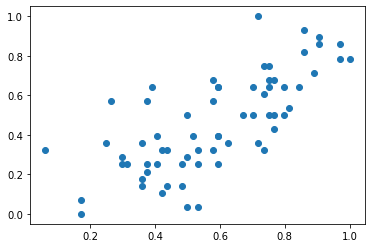

In [99]:
plt.scatter(aidt_score_matrix['aidt'], ait_score_matrix['ait'])

In [90]:
scores = pd.concat([demo_data, dba_score_matrix, sdcc_score_matrix, ait_score_matrix, aidt_score_matrix, dbg_score_matrix], axis = 1)

In [91]:
gender_key = {'Männlich': 'Male', 'Weiblich': 'Female'}

In [92]:
scores.iloc[:,3].replace(gender_key, inplace = True)

In [93]:
ethnic_key = {'Asiatisch':'Asian','Weiß':'White',  'Schwarz/Afroamerikaner':'Black/African American'}

In [94]:
scores.iloc[:,4].replace(ethnic_key, inplace = True)

In [95]:
edu_key = {'MD/Andere Berufsabschlüsse':'MD/Other Professional Degrees', 'Bachelor-Abschluss':'Bachelor\'s Degree',
       'Master-Studium':'Master\'s Degree', 'Keiner':'None', 'Mittlere Reife':'High School/College Degree'}

In [96]:
scores.iloc[:,5].replace(edu_key, inplace = True)

In [97]:
scores.to_csv('grm_data.csv', index = False)

In [104]:
dbg_score_matrix

,dbg
0,0.550
1,0.300
2,0.300
3,0.400
4,0.400
...,...
61,0.350
62,0.350
63,0.375
64,0.425


In [98]:
demo_data_gender= demo_data['demographic_4. Was ist dein Geschlecht?']

In [99]:
sdcc_by_gender = pd.concat([sdcc_score_matrix, demo_data_gender], axis = 1)

In [100]:
dba_by_gender = pd.concat([dba_score_matrix, demo_data_gender], axis = 1)

(array([0., 0., 1., 4., 8., 9., 2., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

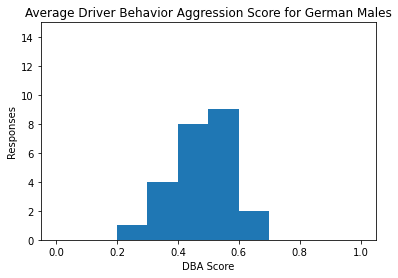

In [101]:
plt.title('Average Driver Behavior Aggression Score for German Males')
plt.xlabel('DBA Score')
plt.ylabel('Responses')
plt.ylim(0, 15)
plt.hist(dba_by_gender.loc[dba_by_gender['demographic_4. Was ist dein Geschlecht?'] == 'Männlich'].dba,
         bins=10,
         range=(0,1))

(array([ 0.,  1.,  5.,  4., 13., 13.,  5.,  1.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

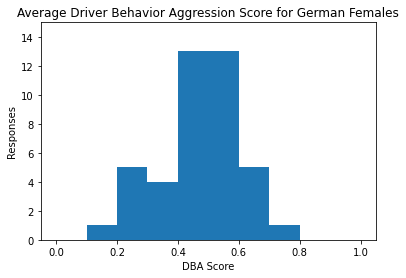

In [102]:
plt.title('Average Driver Behavior Aggression Score for German Females')
plt.xlabel('DBA Score')
plt.ylabel('Responses')
plt.ylim(0,15)
plt.hist(dba_by_gender.loc[dba_by_gender['demographic_4. Was ist dein Geschlecht?'] == 'Weiblich'].dba,
         bins=10,
         range=(0,1))

AttributeError: 'DataFrame' object has no attribute 'sdcc'

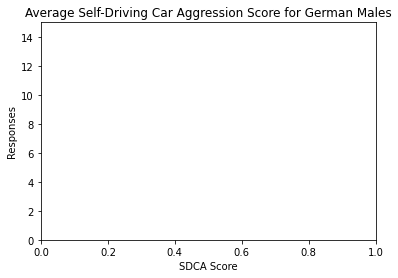

In [103]:
plt.title('Average Self-Driving Car Aggression Score for German Males')
plt.xlabel('SDCA Score')
plt.ylabel('Responses')
plt.ylim(0, 15)
plt.hist(sdcc_by_gender.loc[sdcc_by_gender['demographic_4. Was ist dein Geschlecht?'] == 'Männlich'].sdcc,
         bins=10,
         range=(0,1))

In [ ]:
plt.title('Average Self-Driving Car Aggression Score for German Females')
plt.xlabel('SDCA Score')
plt.ylabel('Responses')
plt.ylim(0, 15)
plt.hist(sdcc_by_gender.loc[sdcc_by_gender['demographic_4. Was ist dein Geschlecht?'] == 'Weiblich'].sdcc,
         bins=10,
         range=(0,1))

In [ ]:
dba_score_matrix = pd.DataFrame(columns = ['dba'])
for index in range(dbnh_values.shape[0]):
    user = []
    user_dbg = []
    for column in range(dbnh_values.shape[1]):
        dba_avg = (dbnh_values.iloc[index][column]+dbh_values.iloc[index][column])/2
        user_dbg.append(dbg_values.iloc[index][column])
        user.append(dba_avg)
    dbg_a = sum(user_dbg)/len(user_dbg)
    dba_nhh = sum(user)/len(user)
    dba = (dbg_a + dba_nhh )/2
    dba_score_matrix = dba_score_matrix.append({'dba':dba}, ignore_index = True)
print(dba_score_matrix)

In [ ]:
sdcc_score_matrix = pd.DataFrame(columns = ['sdcc'])
for index in range(ainh_values.shape[0]):
    user = []
    for column in range(ainh_values.shape[1]):
        sdcc_avg = (ainh_values.iloc[index][column]+aih_values.iloc[index][column])/2
        user.append(sdcc_avg)
    sdcc = sum(user)/len(user)
    sdcc_score_matrix = sdcc_score_matrix.append({'sdcc':sdcc}, ignore_index = True)
print(sdcc_score_matrix)

In [ ]:
dba_score_matrix.hist()

In [ ]:
sdcc_score_matrix.hist()